In [3]:
import numpy as np 
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

### Problem 1

In [7]:
def sim1b(arrival_rate:float, s1_rate:float, s2_rate:float, p:float, T:int=10):
    t = 0
    X1, X2 = 0, 0
    s1, s2 = np.random.exponential(s1_rate), np.random.exponential(s2_rate)
    
    # itterate through each arrrival time (expoential) to time T 
    while t < T:
        arrival = np.random.exponential(arrival_rate)
        
        if t == 0:
            s1 = arrival + np.random.exponential(s1_rate)
            s2 = arrival + np.random.exponential(s2_rate)
            
        t += arrival
        X1 += 1 # always increment by 1 inline with arrivals to server 1
         
        if (X1 > 0):
            if s1 < t:
                X1 -= 1 # reduce the active customer waiting on server 1
                X2 += 1 # move the active customer to server 2
                s1 += np.random.exponential(s1_rate)
                
        if (X2 > 0):
            if s2 < t:
                X2 -= 1 # reduce the active customer waiting on server 2
                s2 += np.random.exponential(s2_rate)
                
                U = np.random.uniform(0,1)
                if U < p:
                    X1 += 1 # with probability p we return back to server 1

    return X1, X2

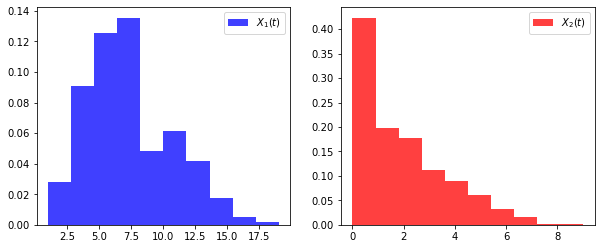

In [43]:
# Generate n samples and plot the underlying distributions
Y = np.array([sim1b(arrival_rate=1, s1_rate=2, s2_rate=3, p=0.2, T=10) for i in range(1000)])

fig, ax = plt.subplots(1, 2)
fig.set_figwidth(10)
ax[0].hist(Y[:, 0], label='$X_1(t)$', alpha=0.75, color='blue', density=True)
ax[0].legend()
ax[1].hist(Y[:, 1], label='$X_2(t)$', alpha=0.75, color='red', density=True)
ax[1].legend()
plt.show()

### Problem 2

In [66]:
def sim2(C:int=1000, burn:int=100):
    
    t, c, X1 = 0, 0, 0
    waiting_times = []
    
    while c < C:
        # interarrival times are i.i.d Exp(1/2)
        interarrival = np.random.exponential(0.5)
        t += interarrival
        
        # First customer waiting time, sum 3 i.i.d Exp(2) random variables
        if c == 0:
            s = t + np.random.exponential(2, size=3).sum()
        
        # If waiting time < arrival we add on the next service time
        if s < t:
            s_time = np.random.exponential(2, size=3).sum()
            
            # After burn-rate of 100 customers, we append the waiting time
            if c > burn:
                waiting_times.append(s_time)
            
            s += s_time
        c += 1
    return np.array(waiting_times)

In [67]:
print(f'The long-run average waiting time of the customers is {round(sim2().mean(), 4)}')

The long-run average waiting time of the customers is 6.2617


### Problem 4

In [17]:
def sim4(mean:float, std:float):
    
    while True:
        # simulate the shifted normal-random variables
        X = np.random.normal(mean, std, 4)

        # calculate minimum of the sums
        min_sum = min(X[0] + X[1], X[2] + X[3], X[0] + X[3], X[1] + X[2])

        if min_sum >= 4:
            # compute likelihood ratio
            weight = np.exp(4 - np.sum(X))
            return weight
    

In [18]:
X = np.array([sim4(2,1) for i in range(100)])
print(f'The long-run average waiting time of the customers is {round(X.mean(), 4)}')

The long-run average waiting time of the customers is 0.0022
